In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
matplotlib inline

In [4]:
simulator = Aer.get_backend('qasm_simulator')

In [5]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [6]:
# Initializing the variables for A.
J = 0.5
h1 = -0.5
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resA = np.zeros([n, n, 4])
qc_list = []

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resA[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

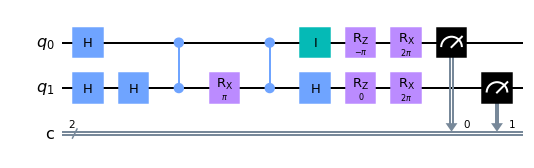

In [7]:
#Draw the current circuit
qc.draw(output='mpl')

<AxesSubplot:>

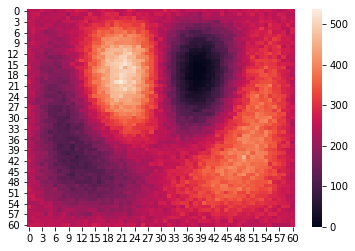

In [33]:
# Making a heatmap plot
sns.heatmap(resA[:, :, 0]*0  + resA[:, :, 1]  + resA[:, :, 2]*0  + resA[:, :, 3]*0 )

In [14]:
# Initializing the variables for B.
J = 0
h1 = -1
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resB = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resB[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

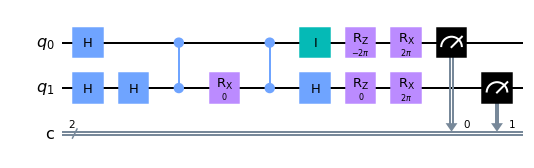

In [16]:
#Draw the current circuit
qc.draw(output='mpl')

<AxesSubplot:>

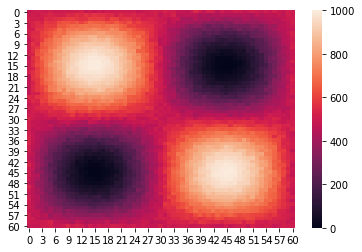

In [32]:
# Making a heatmap plot
sns.heatmap(resB[:, :, 0]*0  + resB[:, :, 1]  + resB[:, :, 2]*0  + resB[:, :, 3] )

In [25]:
# Initializing the variables for C.
J = 0
h1 = -0.5
h2 = -0.5

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resC = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resC[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

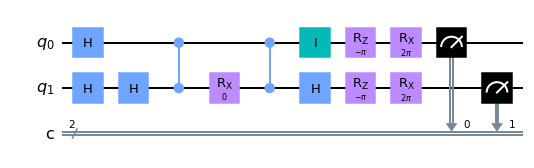

In [26]:
#Draw the current circuit
qc.draw(output='mpl')

<AxesSubplot:>

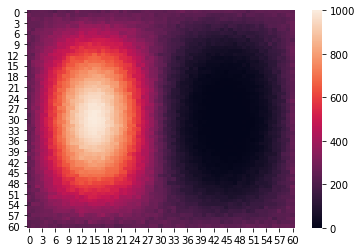

In [27]:
# Making a heatmap plot
sns.heatmap(resC[:, :, 3])

In [28]:
# Initializing the variables for D.
J = 1
h1 = 0
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
resD = np.zeros([n, n, 4])

# Running a simulation for each point
for i in range(n):
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)
        counts = execute(qc, backend = simulator, shots=1000).result().get_counts()
        resD[i][j][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                                 int(counts.get('11', 0))])

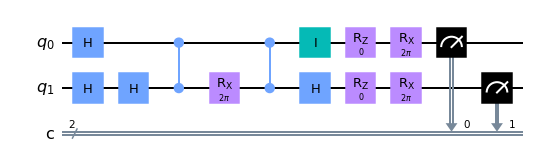

In [29]:
#Draw the current circuit
qc.draw(output='mpl')

<AxesSubplot:>

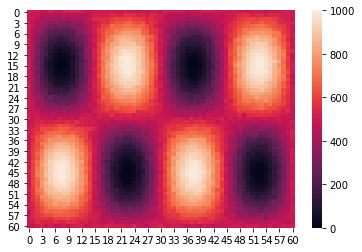

In [31]:
# Making a heatmap plot
sns.heatmap(resD[:, :, 0]*0 + resD[:, :, 1]  + resD[:, :, 2]  + resD[:, :, 3] *0 )